In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
train_cat = pd.read_excel(r"C:\Users\Samah Samir\Downloads\widsdatathon2025\TRAIN_NEW\TRAIN_CATEGORICAL_METADATA_new.xlsx")
train_func = pd.read_csv(r"C:\Users\Samah Samir\Downloads\widsdatathon2025\TRAIN_NEW\TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv")
train_quant = pd.read_excel(r"C:\Users\Samah Samir\Downloads\widsdatathon2025\TRAIN_NEW\TRAIN_QUANTITATIVE_METADATA_new.xlsx")
train_labels = pd.read_excel(r"C:\Users\Samah Samir\Downloads\widsdatathon2025\TRAIN_NEW\TRAINING_SOLUTIONS.xlsx")

EDA

In [3]:
#Barratt_Barratt_P2_Occ - Barratt Simplified Measure of Social Status - Parent 2 Occupation
train_cat['Barratt_Barratt_P2_Occ'].value_counts()

#Look back at the dictionary on Kaggle!
# to see what category these integers [0, 45, 35...] represent.

Barratt_Barratt_P2_Occ
45.0    239
35.0    195
30.0    149
40.0    116
15.0     86
0.0      65
20.0     41
5.0      38
10.0     37
25.0     25
Name: count, dtype: int64

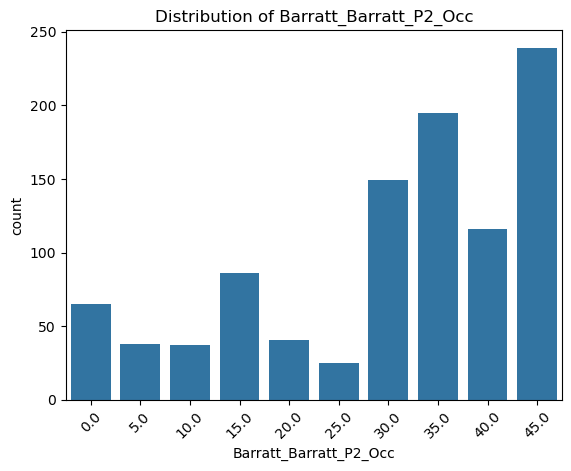

In [4]:
sns.countplot(x='Barratt_Barratt_P2_Occ', data=train_cat[['Barratt_Barratt_P2_Occ']])
plt.title(f"Distribution of Barratt_Barratt_P2_Occ")
plt.xticks(rotation=45)
plt.show()

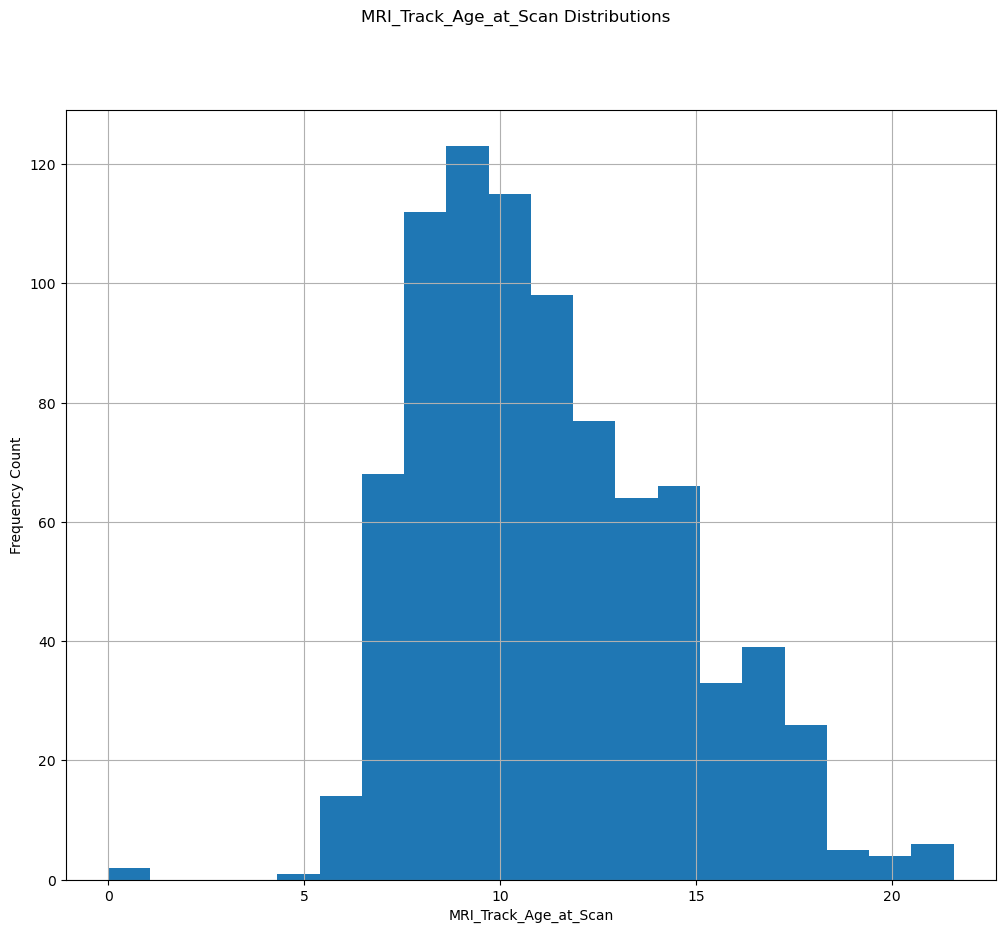

In [5]:
# Distribution of MRI_Track_Age_at_Scan
train_quant['MRI_Track_Age_at_Scan'].hist(figsize=(12, 10), bins=20)
plt.suptitle("MRI_Track_Age_at_Scan Distributions")
plt.xlabel('MRI_Track_Age_at_Scan')
plt.ylabel('Frequency Count')
plt.show()


In [6]:
# ADHD distribution
train_labels['ADHD_Outcome'].value_counts()

ADHD_Outcome
1    831
0    382
Name: count, dtype: int64

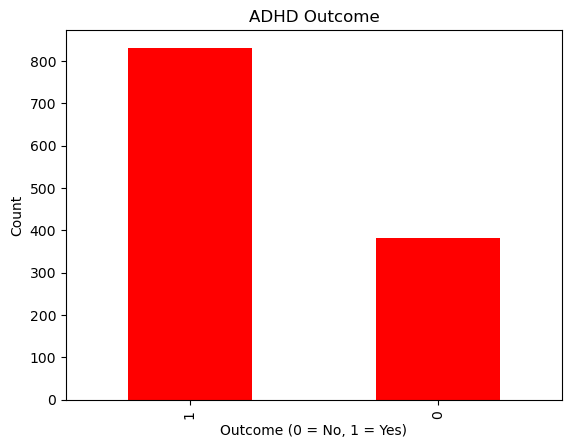

In [8]:
train_labels['ADHD_Outcome'].value_counts().plot(kind='bar', color='red')
plt.title('ADHD Outcome')
plt.xlabel('Outcome (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

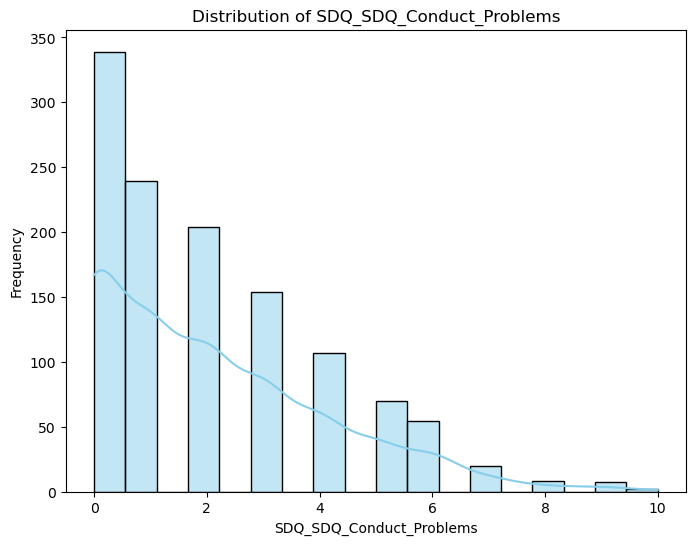

In [10]:
# Plot the distribution of the SDQ_SDQ_Emotional_Problems variable
plt.figure(figsize=(8, 6))
sns.histplot(train_quant['SDQ_SDQ_Conduct_Problems'], kde=True, color='skyblue')
plt.title('Distribution of SDQ_SDQ_Conduct_Problems')
plt.xlabel('SDQ_SDQ_Conduct_Problems')
plt.ylabel('Frequency')
plt.show()

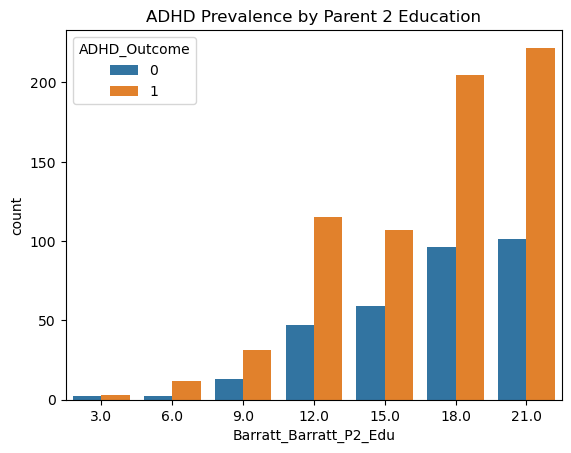

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=train_cat, x='Barratt_Barratt_P2_Edu', hue=train_labels['ADHD_Outcome'])
plt.title('ADHD Prevalence by Parent 2 Education')
plt.show()

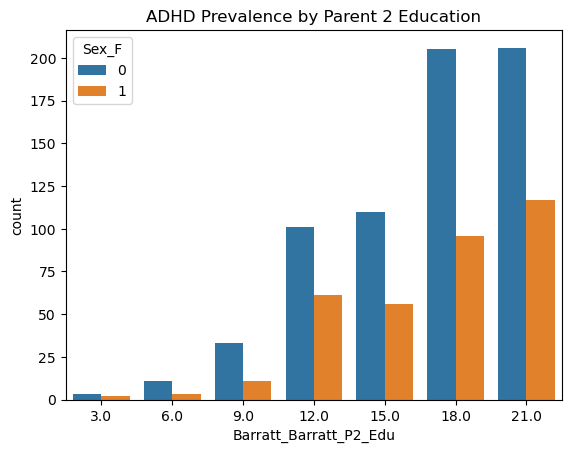

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=train_cat, x='Barratt_Barratt_P2_Edu', hue=train_labels['Sex_F'])
plt.title('ADHD Prevalence by Parent 2 Education')
plt.show()

In [15]:
# Add ADHD_Outcome directly to a copy of the train_cat dataset for grouping
train_cat_copy = train_cat.copy()
train_cat_copy['ADHD_Outcome'] = train_labels['ADHD_Outcome']

adhd_percentages = train_cat_copy.groupby('Barratt_Barratt_P2_Edu')['ADHD_Outcome'].mean()
print(adhd_percentages)

Barratt_Barratt_P2_Edu
3.0     0.600000
6.0     0.857143
9.0     0.704545
12.0    0.709877
15.0    0.644578
18.0    0.681063
21.0    0.687307
Name: ADHD_Outcome, dtype: float64


In [ ]:
# Add ADHD_Outcome directly to a copy of the train_cat dataset for grouping
train_cat_copy = train_cat.copy()
train_cat_copy['Sex_F'] = train_labels['Sex_F']

sex_percentages = train_cat_copy.groupby('Barratt_Barratt_P2_Edu')['Sex_F'].mean()
print(sex._percentages)

Barratt_Barratt_P2_Edu
3.0     0.400000
6.0     0.214286
9.0     0.250000
12.0    0.376543
15.0    0.337349
18.0    0.318937
21.0    0.362229
Name: Sex_F, dtype: float64


Pre-Processing

In [3]:

target_col = 'PreInt_Demos_Fam_Child_Ethnicity'
group_col = 'Basic_Demos_Study_Site'

train_cat[target_col] = (
    train_cat.groupby(group_col)
    .apply(lambda x: x[target_col].fillna(x[target_col].mode()[0]))
    .reset_index(level=0, drop=True)  # Reset the index to match the original DataFrame
)


C:\Users\Samah Samir\AppData\Local\Temp\ipykernel_17100\3340232598.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x[target_col].fillna(x[target_col].mode()[0]))


In [4]:
train_cat[target_col].isnull().sum()

0

In [5]:
target_col = 'PreInt_Demos_Fam_Child_Race'
group_col = 'PreInt_Demos_Fam_Child_Ethnicity'

train_cat[target_col] = (
    train_cat.groupby(group_col)
    .apply(lambda x: x[target_col].fillna(x[target_col].mode()[0]))
    .reset_index(level=0, drop=True)  # Reset the index to match the original DataFrame
)


C:\Users\Samah Samir\AppData\Local\Temp\ipykernel_17100\1705901117.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x[target_col].fillna(x[target_col].mode()[0]))


In [6]:
col1 = 'Barratt_Barratt_P2_Occ'
col2 = 'Barratt_Barratt_P2_Edu'

# Count how many rows have NaN in both columns
both_missing = train_cat[train_cat[col1].isna() & train_cat[col2].isna()].shape[0]

print(f"Number of rows where both '{col1}' and '{col2}' are missing: {both_missing}")
#These two columns are highly dependant as it is highly probable that the P2 with missing EDU will have missing Occ too

Number of rows where both 'Barratt_Barratt_P2_Occ' and 'Barratt_Barratt_P2_Edu' are missing: 184


In [7]:
#Handle missing - standardize train cat
# 2. For categorical columns (e.g., participant_id, Basic_Demos_Study_Site), fill with mode or drop rows
categorical_columns_gen = ['Barratt_Barratt_P1_Edu','MRI_Track_Scan_Location']

# We can choose to fill missing categorical data with the mode
for col in categorical_columns_gen:
    train_cat[col] = train_cat[col].fillna(train_cat[col].mode()[0])  # Fill with the most frequent value (mode)

In [8]:
target_col = 'Barratt_Barratt_P1_Occ'
group_col = 'Barratt_Barratt_P1_Edu'

train_cat[target_col] = (
    train_cat.groupby(group_col)
    .apply(lambda x: x[target_col].fillna(x[target_col].mode()[0]))
    .reset_index(level=0, drop=True)  # Reset the index to match the original DataFrame
)


C:\Users\Samah Samir\AppData\Local\Temp\ipykernel_17100\761786904.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x[target_col].fillna(x[target_col].mode()[0]))


In [9]:
target_col = 'Barratt_Barratt_P2_Edu'
group_col = 'Barratt_Barratt_P1_Edu'

train_cat[target_col] = (
    train_cat.groupby(group_col)
    .apply(lambda x: x[target_col].fillna(x[target_col].mode()[0]))
    .reset_index(level=0, drop=True)  # Reset the index to match the original DataFrame
)


C:\Users\Samah Samir\AppData\Local\Temp\ipykernel_17100\2069621137.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x[target_col].fillna(x[target_col].mode()[0]))


In [10]:
target_col = 'Barratt_Barratt_P2_Occ'
group_col = 'Barratt_Barratt_P1_Edu'

train_cat[target_col] = (
    train_cat.groupby(group_col)
    .apply(lambda x: x[target_col].fillna(x[target_col].mode()[0]))
    .reset_index(level=0, drop=True)  # Reset the index to match the original DataFrame
)


C:\Users\Samah Samir\AppData\Local\Temp\ipykernel_17100\2642335887.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x[target_col].fillna(x[target_col].mode()[0]))


In [11]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1213 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   float64
 5   MRI_Track_Scan_Location           1213 non-null   float64
 6   Barratt_Barratt_P1_Edu            1213 non-null   float64
 7   Barratt_Barratt_P1_Occ            1213 non-null   float64
 8   Barratt_Barratt_P2_Edu            1213 non-null   float64
 9   Barratt_Barratt_P2_Occ            1213 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 94.9+ KB


In [12]:
# Creating a list of all of the columns except the first
columns_to_encode = train_cat.columns[1:].tolist()
train_cat[columns_to_encode] = train_cat[columns_to_encode].astype(str)

# Print the columns to encode
print("Columns to encode:", columns_to_encode)
# encoding categorical data
train_encoded = pd.get_dummies(train_cat[columns_to_encode], drop_first=True)
train_encoded = train_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))
# Combine encoded columns with the rest of the DataFrame
cat_train_final = pd.concat([train_cat.drop(columns=columns_to_encode), train_encoded], axis=1)

# ensure it looks correct
cat_train_final.head()

Columns to encode: ['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ']


C:\Users\Samah Samir\AppData\Local\Temp\ipykernel_17100\1211792523.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_encoded = train_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))


,participant_id,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,PreInt_Demos_Fam_Child_Ethnicity_1.0,...,Barratt_Barratt_P2_Edu_9.0,Barratt_Barratt_P2_Occ_10.0,Barratt_Barratt_P2_Occ_15.0,Barratt_Barratt_P2_Occ_20.0,Barratt_Barratt_P2_Occ_25.0,Barratt_Barratt_P2_Occ_30.0,Barratt_Barratt_P2_Occ_35.0,Barratt_Barratt_P2_Occ_40.0,Barratt_Barratt_P2_Occ_45.0,Barratt_Barratt_P2_Occ_5.0
0,00aIpNTbG5uh,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
1,00fV0OyyoLfw,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,04X1eiS79T4B,0,1,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
3,05ocQutkURd6,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,06YUNBA9ZRLq,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [13]:
#Handle missing - standardize train quant
numerical_columns = train_quant.select_dtypes(include=['float64', 'int64']).columns

# Impute numerical columns with the median (for robustness)
train_quant[numerical_columns] = train_quant[numerical_columns].apply(lambda col: col.fillna(col.median()))

In [14]:
# Create a copy of the dataset to preserve original
train_quant = train_quant.copy()

# Exclude 'participant_id' and apply StandardScaler to the remaining columns
columns_to_scale = train_quant.drop(columns=['participant_id']).columns

# Apply StandardScaler to the selected columns
scaler = StandardScaler()
train_quant[columns_to_scale] = scaler.fit_transform(train_quant[columns_to_scale])

In [15]:
merged_df = pd.merge(train_cat, train_func, on='participant_id', how='outer')  # First merge no One Hot Encoding
merged_df = pd.merge(merged_df, train_quant, on='participant_id', how='outer')  # Merge with the third dataset

In [16]:
merged_df_2= pd.merge(cat_train_final, train_func, on='participant_id', how='outer')  # First merge with One Hot Encoding
merged_df_2 = pd.merge(merged_df_2, train_quant, on='participant_id', how='outer')  # Merge with the third dataset

In [17]:
X_p = merged_df.drop(columns='participant_id')  # The merged features dataframe (train_cat, train_func, train_quant)
y_p = train_labels # Labels (sex and ADHD)
y_p = y_p.drop(columns=['participant_id'])
# Now, perform the train-test split (30% test, 70% train)
X_train, X_test, y_train, y_test = train_test_split(X_p, y_p, test_size=0.3, random_state=42)


In [18]:
X= merged_df_2.drop(columns='participant_id')  # The merged features dataframe (train_cat, train_func, train_quant) -- With One Hot Encoding
y = train_labels # Labels (sex and ADHD)
y = y.drop(columns=['participant_id'])
# Now, perform the train-test split (30% test, 70% train)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.3, random_state=42)


In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train['Sex_F'])
# Get coefficients for Sex prediction
coefficients = pd.Series(model.coef_[0], index=X_train.columns)
# Select top features for Sex prediction
top_features = coefficients.abs().nlargest(10)
print(top_features)


APQ_P_APQ_P_INV               0.296028
SDQ_SDQ_Emotional_Problems    0.196034
3throw_66thcolumn             0.185339
56throw_57thcolumn            0.183500
103throw_147thcolumn          0.178986
4throw_159thcolumn            0.175532
133throw_134thcolumn          0.174941
54throw_129thcolumn           0.173126
56throw_134thcolumn           0.169580
153throw_172thcolumn          0.169133
dtype: float64


c:\Users\Samah Samir\anacondaNew\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train['ADHD_Outcome'])
# Get coefficients for Sex prediction
coefficients = pd.Series(model.coef_[0], index=X_train.columns)
# Select top features for Sex prediction
top_features = coefficients.abs().nlargest(10)
print(top_features)


APQ_P_APQ_P_ID             0.345387
SDQ_SDQ_Prosocial          0.298082
EHQ_EHQ_Total              0.243267
MRI_Track_Scan_Location    0.226281
52throw_84thcolumn         0.204846
APQ_P_APQ_P_OPD            0.201492
59throw_71thcolumn         0.189067
38throw_99thcolumn         0.185920
APQ_P_APQ_P_PP             0.184491
174throw_198thcolumn       0.183862
dtype: float64


c:\Users\Samah Samir\anacondaNew\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
#WITH ONE HOT ENCODING
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_2, y_train_2['Sex_F'])
# Get coefficients for Sex prediction
coefficients = pd.Series(model.coef_[0], index=X_train_2.columns)
# Select top features for Sex prediction
top_features = coefficients.abs().nlargest(10)
print(top_features)


APQ_P_APQ_P_INV                0.294378
Barratt_Barratt_P2_Edu_15.0    0.238799
3throw_66thcolumn              0.187241
133throw_134thcolumn           0.182308
56throw_57thcolumn             0.181778
103throw_147thcolumn           0.178202
Barratt_Barratt_P2_Occ_30.0    0.174423
56throw_134thcolumn            0.174276
153throw_172thcolumn           0.173548
68throw_81thcolumn             0.173410
dtype: float64


In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_2, y_train_2['ADHD_Outcome'])
# Get coefficients for Sex prediction
coefficients = pd.Series(model.coef_[0], index=X_train_2.columns)
# Select top features for Sex prediction
top_features = coefficients.abs().nlargest(10)
print(top_features)


APQ_P_APQ_P_ID                 0.330004
SDQ_SDQ_Prosocial              0.260343
EHQ_EHQ_Total                  0.236997
Barratt_Barratt_P2_Edu_15.0    0.225987
Barratt_Barratt_P2_Occ_45.0    0.223876
52throw_84thcolumn             0.207961
APQ_P_APQ_P_PP                 0.204149
Barratt_Barratt_P2_Edu_21.0    0.199177
APQ_P_APQ_P_OPD                0.193076
59throw_71thcolumn             0.190752
dtype: float64


In [23]:
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X, y['Sex_F'])
selected_features_Sex = X.columns[model.coef_[0] != 0]
print(selected_features_Sex)

Index(['Basic_Demos_Enroll_Year_2017', 'Basic_Demos_Enroll_Year_2019',
       'Basic_Demos_Study_Site_3', 'Barratt_Barratt_P1_Edu_15.0',
       'Barratt_Barratt_P1_Edu_18.0', 'Barratt_Barratt_P1_Occ_25.0',
       'Barratt_Barratt_P1_Occ_35.0', 'Barratt_Barratt_P2_Edu_15.0',
       'Barratt_Barratt_P2_Edu_21.0', 'Barratt_Barratt_P2_Occ_35.0',
       ...
       'ColorVision_CV_Score', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'SDQ_SDQ_Emotional_Problems',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Prosocial', 'MRI_Track_Age_at_Scan'],
      dtype='object', length=762)


In [24]:
model = LogisticRegression(penalty='l1', solver='liblinear') # With One Hot encoding
model.fit(X_p, y_p['Sex_F'])
selected_features_Sex_p = X_p.columns[model.coef_[0] != 0]
print(selected_features_Sex_p)

Index(['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Race', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ', '0throw_60thcolumn', '0throw_86thcolumn',
       '0throw_87thcolumn',
       ...
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD',
       'APQ_P_APQ_P_PM', 'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Prosocial', 'MRI_Track_Age_at_Scan'],
      dtype='object', length=747)


In [25]:
model.fit(X, y['ADHD_Outcome'])
selected_features_ADHD = X.columns[model.coef_[0] != 0]
print(selected_features_ADHD)

Index(['Basic_Demos_Enroll_Year_2016', 'Basic_Demos_Study_Site_4',
       'PreInt_Demos_Fam_Child_Ethnicity_2.0', 'Barratt_Barratt_P1_Occ_15.0',
       'Barratt_Barratt_P1_Occ_35.0', 'Barratt_Barratt_P1_Occ_40.0',
       'Barratt_Barratt_P1_Occ_45.0', 'Barratt_Barratt_P2_Edu_15.0',
       'Barratt_Barratt_P2_Occ_15.0', 'Barratt_Barratt_P2_Occ_30.0',
       ...
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Peer_Problems', 'MRI_Track_Age_at_Scan'],
      dtype='object', length=739)


In [26]:
model.fit(X_p, y_p['ADHD_Outcome']) #With One Hot Encoding
selected_features_ADHD_p= X_p.columns[model.coef_[0] != 0]
print(selected_features_ADHD_p)

Index(['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ', '0throw_3thcolumn',
       ...
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Prosocial', 'MRI_Track_Age_at_Scan'],
      dtype='object', length=696)


In [27]:
# Step 1: Find common features between ADHD and Sex selected features
common_features = list(set(selected_features_ADHD) & set(selected_features_Sex))
X_new = X[common_features]
print(common_features)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.3, random_state=42)


['22throw_76thcolumn', '157throw_167thcolumn', '43throw_47thcolumn', 'Barratt_Barratt_P1_Occ_35.0', '53throw_73thcolumn', '136throw_172thcolumn', '95throw_174thcolumn', '3throw_168thcolumn', 'EHQ_EHQ_Total', 'SDQ_SDQ_Hyperactivity', '19throw_70thcolumn', '66throw_78thcolumn', '37throw_99thcolumn', 'ColorVision_CV_Score', '64throw_130thcolumn', '83throw_102thcolumn', 'APQ_P_APQ_P_PM', '90throw_139thcolumn', '29throw_31thcolumn', 'APQ_P_APQ_P_OPD', '172throw_176thcolumn', '27throw_108thcolumn', '163throw_179thcolumn', 'APQ_P_APQ_P_INV', '29throw_30thcolumn', '41throw_183thcolumn', '147throw_176thcolumn', '104throw_191thcolumn', 'MRI_Track_Age_at_Scan', '5throw_164thcolumn', 'APQ_P_APQ_P_CP', '57throw_174thcolumn', '38throw_61thcolumn', 'SDQ_SDQ_Emotional_Problems', '62throw_183thcolumn', '69throw_80thcolumn', '38throw_142thcolumn', 'Barratt_Barratt_P2_Occ_35.0', '16throw_61thcolumn', 'Barratt_Barratt_P2_Edu_15.0', '85throw_155thcolumn', '90throw_187thcolumn', '161throw_167thcolumn', '131

In [28]:
len(common_features)

46

In [29]:
# Step 1: Find common features between ADHD and Sex selected features
common_features_p = list(set(selected_features_ADHD_p) & set(selected_features_Sex_p))
X_new = X_p[common_features_p]
X_train_new_p, X_test_new_p, y_train_new_p, y_test_new_p = train_test_split(X_new, y_p, test_size=0.3, random_state=42)
print(len(common_features_p))


56


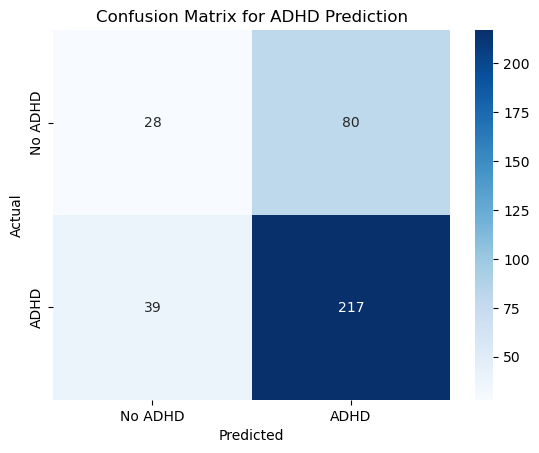

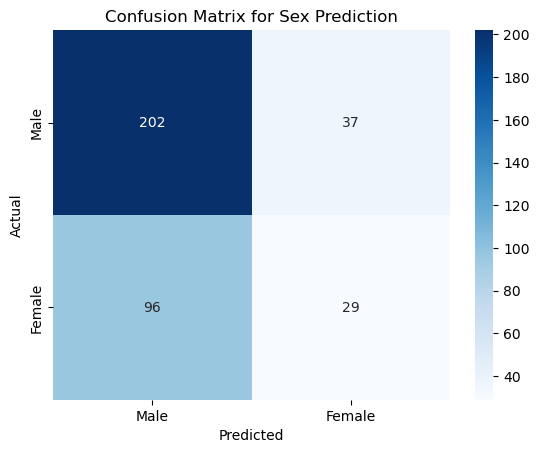

Weighted F1 Score for ADHD: 0.6468994296842397
Weighted F1 Score for Sex: 0.5982539743252253
Average Weighted F1 Score: 0.6225767020047326


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Initialize the MultiOutputClassifier with Logistic Regression
multi_target_model = MultiOutputClassifier(log_reg, n_jobs=-1)

# Train the model on both ADHD and Sex labels
multi_target_model.fit(X_train_new, y_train_new)

# Make predictions on the test set
y_pred = multi_target_model.predict(X_test_new)

# Evaluate the model for ADHD (first output)
conf_matrix_adhd = confusion_matrix(y_test_new['ADHD_Outcome'], y_pred[:, 0])  # ADHD predictions are in column 0
f1_adhd = f1_score(y_test_new['ADHD_Outcome'], y_pred[:, 0], average='weighted')

# Evaluate the model for Sex (second output)
conf_matrix_sex = confusion_matrix(y_test_new['Sex_F'], y_pred[:, 1])  # Sex predictions are in column 1
f1_sex = f1_score(y_test_new['Sex_F'], y_pred[:, 1], average='weighted')

# Visualize the confusion matrix for ADHD
sns.heatmap(conf_matrix_adhd, annot=True, fmt='d', cmap='Blues', xticklabels=['No ADHD', 'ADHD'], yticklabels=['No ADHD', 'ADHD'])
plt.title("Confusion Matrix for ADHD Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualize the confusion matrix for Sex
sns.heatmap(conf_matrix_sex, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.title("Confusion Matrix for Sex Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Calculate the average of the weighted F1 scores for both labels (ADHD and Sex)
average_f1 = (f1_adhd + f1_sex) / 2
print(f"Weighted F1 Score for ADHD: {f1_adhd}")
print(f"Weighted F1 Score for Sex: {f1_sex}")
print(f"Average Weighted F1 Score: {average_f1}")

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


c:\Users\Samah Samir\anacondaNew\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan 

Best Parameters from GridSearchCV: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


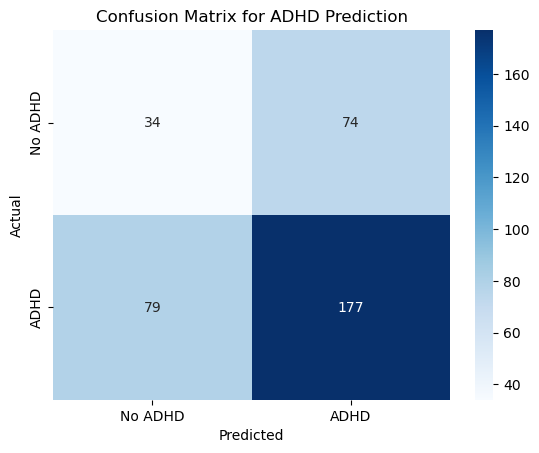

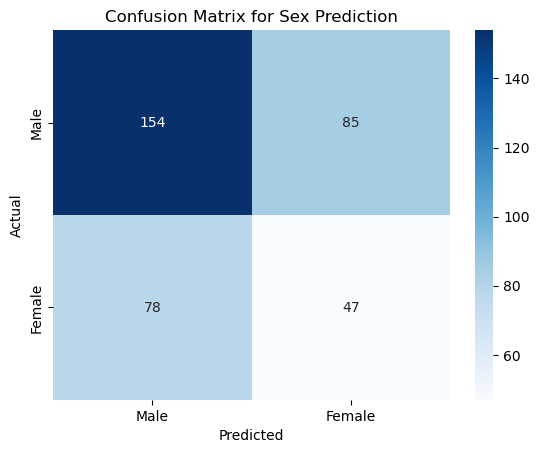

Weighted F1 Score for ADHD: 0.5823525586839197
Weighted F1 Score for Sex: 0.5549686585276067
Average Weighted F1 Score: 0.5686606086057632


In [37]:
decision_tree = DecisionTreeClassifier(class_weight='balanced',random_state=42)

# Step 4: Set up the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10 ,15],
    'min_samples_leaf': [1, 2, 4 ,6,10],
    'criterion': ['gini', 'entropy']
}

# Step 5: Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1')
grid_search.fit(X_train_new, y_train_new)

# Step 6: Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best Parameters from GridSearchCV: {best_params}")

# Step 7: Use the best parameters to train the Decision Tree classifier
best_decision_tree = DecisionTreeClassifier(**best_params, random_state=42)

# Step 8: Wrap the best Decision Tree with MultiOutputClassifier
multi_target_model = MultiOutputClassifier(best_decision_tree, n_jobs=-1)

# Step 9: Train the model on both ADHD and Sex labels
multi_target_model.fit(X_train_new, y_train_new)

# Step 10: Make predictions on the test set
y_pred = multi_target_model.predict(X_test_new)

# Step 11: Evaluate the model for ADHD (first output)
conf_matrix_adhd = confusion_matrix(y_test_new['ADHD_Outcome'], y_pred[:, 0])  # ADHD predictions are in column 0
f1_adhd = f1_score(y_test_new['ADHD_Outcome'], y_pred[:, 0], average='weighted')

# Step 12: Evaluate the model for Sex (second output)
conf_matrix_sex = confusion_matrix(y_test_new['Sex_F'], y_pred[:, 1])  # Sex predictions are in column 1
f1_sex = f1_score(y_test_new['Sex_F'], y_pred[:, 1], average='weighted')

# Step 13: Visualize the confusion matrix for ADHD
sns.heatmap(conf_matrix_adhd, annot=True, fmt='d', cmap='Blues', xticklabels=['No ADHD', 'ADHD'], yticklabels=['No ADHD', 'ADHD'])
plt.title("Confusion Matrix for ADHD Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 14: Visualize the confusion matrix for Sex
sns.heatmap(conf_matrix_sex, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.title("Confusion Matrix for Sex Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 15: Calculate the average of the weighted F1 scores for both labels (ADHD and Sex)
average_f1 = (f1_adhd + f1_sex) / 2

# Step 16: Print out the results
print(f"Weighted F1 Score for ADHD: {f1_adhd}")
print(f"Weighted F1 Score for Sex: {f1_sex}")
print(f"Average Weighted F1 Score: {average_f1}")

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
Best Parameters from GridSearchCV: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


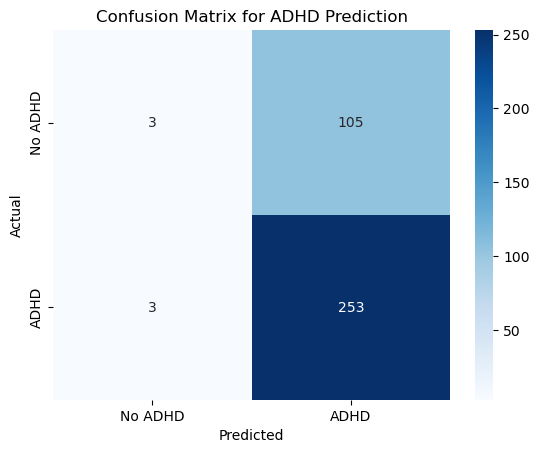

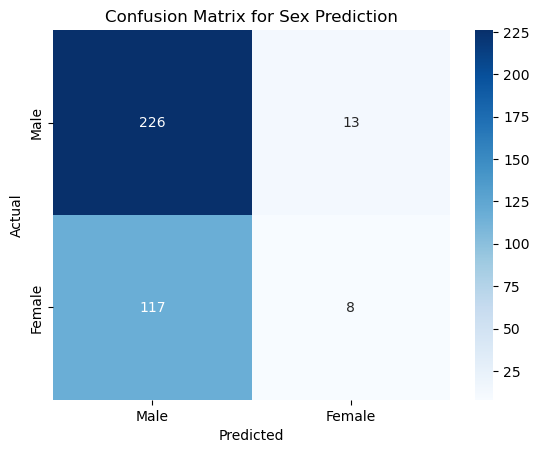

Weighted F1 Score for ADHD: 0.5952057543005597
Weighted F1 Score for Sex: 0.5475652483843417
Average Weighted F1 Score: 0.5713855013424507


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42, n_jobs=-1)

# Step 2: Set up the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30, 40, 50, None],  # Max depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4, 6],  # Minimum samples required at a leaf node
    'criterion': ['gini', 'entropy'],  # Split criterion
}

# Step 3: Use GridSearchCV to find the best parameters for Random Forest
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2, scoring='f1_weighted')
grid_search.fit(X_train_new, y_train_new)

# Step 4: Get the best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best Parameters from GridSearchCV: {best_params}")

# Step 5: Train the best Random Forest model using MultiOutputClassifier
best_random_forest = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
multi_target_model = MultiOutputClassifier(best_random_forest, n_jobs=-1)
multi_target_model.fit(X_train_new, y_train_new)

# Step 6: Make predictions on the test set
y_pred = multi_target_model.predict(X_test_new)

# Step 7: Evaluate the model for ADHD and Sex
conf_matrix_adhd = confusion_matrix(y_test_new['ADHD_Outcome'], y_pred[:, 0])  # ADHD predictions are in column 0
f1_adhd = f1_score(y_test_new['ADHD_Outcome'], y_pred[:, 0], average='weighted')

conf_matrix_sex = confusion_matrix(y_test_new['Sex_F'], y_pred[:, 1])  # Sex predictions are in column 1
f1_sex = f1_score(y_test_new['Sex_F'], y_pred[:, 1], average='weighted')

# Step 8: Visualize the confusion matrix for ADHD
sns.heatmap(conf_matrix_adhd, annot=True, fmt='d', cmap='Blues', xticklabels=['No ADHD', 'ADHD'], yticklabels=['No ADHD', 'ADHD'])
plt.title("Confusion Matrix for ADHD Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 9: Visualize the confusion matrix for Sex
sns.heatmap(conf_matrix_sex, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.title("Confusion Matrix for Sex Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 10: Calculate the average of the weighted F1 scores
average_f1 = (f1_adhd + f1_sex) / 2

# Step 11: Print out the results
print(f"Weighted F1 Score for ADHD: {f1_adhd}")
print(f"Weighted F1 Score for Sex: {f1_sex}")
print(f"Average Weighted F1 Score: {average_f1}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits


Best Parameters from GridSearchCV: {'leaf_size': 20, 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}


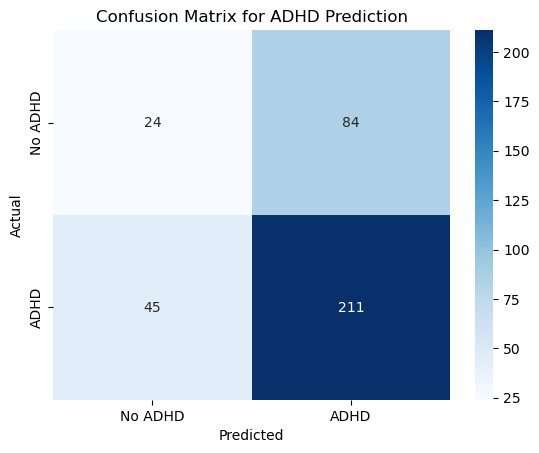

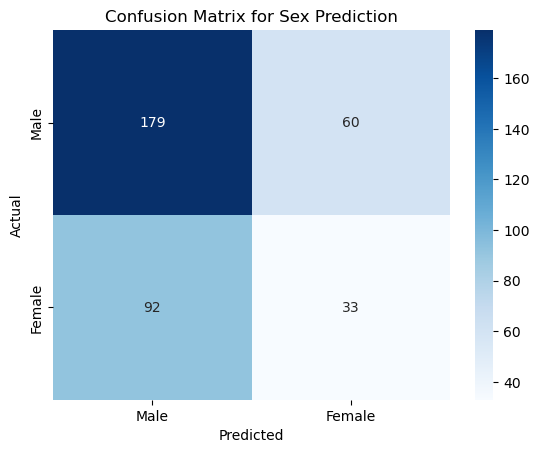

Weighted F1 Score for ADHD: 0.6191029432593308
Weighted F1 Score for Sex: 0.564869956451176
Average Weighted F1 Score: 0.5919864498552534


In [40]:
knn = KNeighborsClassifier()

# Step 2: Set up the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15, 20],  # Number of neighbors to use for classification
    'weights': ['uniform', 'distance'],  # 'uniform' (equal weight) or 'distance' (closer neighbors have more weight)
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric to use
    'leaf_size': [20, 30, 40],  # Leaf size for efficient searching in k-d tree
}

# Step 3: Use GridSearchCV to find the best parameters for KNN
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1_weighted')
grid_search.fit(X_train_new, y_train_new)

# Step 4: Get the best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best Parameters from GridSearchCV: {best_params}")

# Step 5: Train the best KNN model using MultiOutputClassifier
best_knn = KNeighborsClassifier(**best_params)
multi_target_model = MultiOutputClassifier(best_knn, n_jobs=-1)
multi_target_model.fit(X_train_new, y_train_new)
# Step 6: Make predictions on the test set
y_pred = multi_target_model.predict(X_test_new)

# Step 7: Evaluate the model for ADHD and Sex
conf_matrix_adhd = confusion_matrix(y_test_new['ADHD_Outcome'], y_pred[:, 0])  # ADHD predictions are in column 0
f1_adhd = f1_score(y_test_new['ADHD_Outcome'], y_pred[:, 0], average='weighted')

conf_matrix_sex = confusion_matrix(y_test_new['Sex_F'], y_pred[:, 1])  # Sex predictions are in column 1
f1_sex = f1_score(y_test_new['Sex_F'], y_pred[:, 1], average='weighted')

# Step 8: Visualize the confusion matrix for ADHD
sns.heatmap(conf_matrix_adhd, annot=True, fmt='d', cmap='Blues', xticklabels=['No ADHD', 'ADHD'], yticklabels=['No ADHD', 'ADHD'])
plt.title("Confusion Matrix for ADHD Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 9: Visualize the confusion matrix for Sex
sns.heatmap(conf_matrix_sex, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.title("Confusion Matrix for Sex Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 10: Calculate the average of the weighted F1 scores
average_f1 = (f1_adhd + f1_sex) / 2

# Step 11: Print out the results
print(f"Weighted F1 Score for ADHD: {f1_adhd}")
print(f"Weighted F1 Score for Sex: {f1_sex}")
print(f"Average Weighted F1 Score: {average_f1}")

MODELS NEW

In [30]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [31]:
def custom_weighted_f1(y_true, y_pred):
    weights = np.ones(len(y_true))
    weights[(y_true[:, 1] == 1) & (y_true[:, 0] == 1)] = 2  # ADHD_Outcome = 1 and Sex = 1 (female)
    f1_sex = f1_score(y_true[:, 0], y_pred[:, 0], sample_weight=weights)
    f1_adhd = f1_score(y_true[:, 1], y_pred[:, 1], sample_weight=weights)
    return (f1_sex + f1_adhd) / 2

In [32]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n=== {model_name} Evaluation ===")
    print("Confusion Matrix - Sex:\n", confusion_matrix(y_true[:, 0], y_pred[:, 0]))
    print("Confusion Matrix - ADHD:\n", confusion_matrix(y_true[:, 1], y_pred[:, 1]))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='macro'))
    print("Recall:", recall_score(y_true, y_pred, average='macro'))
    print("F1 Score:", f1_score(y_true, y_pred, average='macro'))
    print("Custom Weighted F1 Score:", custom_weighted_f1(y_true, y_pred))


In [ ]:
dt_params = {
    "estimator__max_depth": [5, 10, 20,60 ,120,200,500,1000 ,None],
    "estimator__min_samples_split": [2, 5, 10,20,50,100,200,500],
    "estimator__min_samples_leaf": [1, 2, 4,10,20,50,100,200,500]
}
dt_model = GridSearchCV(MultiOutputClassifier(DecisionTreeClassifier(random_state=42)), dt_params, scoring='f1_macro', cv=3, n_jobs=-1)
dt_model.fit(X_train, y_train)
evaluate_model(y_test.values, dt_model.predict(X_test), "Decision Tree")

# ========== KNN ==========
knn_params = {
    "estimator__n_neighbors": [3, 5, 7, 9 ,20,50,100,200,600,1000],
    "estimator__weights": ['uniform', 'distance']
}
knn_model = GridSearchCV(MultiOutputClassifier(KNeighborsClassifier()), knn_params, scoring='f1_macro', cv=3, n_jobs=-1)
knn_model.fit(X_train, y_train)
evaluate_model(y_test.values, knn_model.predict(X_test), "KNN")

# ========== Random Forest ==========
rf_params = {
    "estimator__n_estimators": [100, 200,500,700,1000,2000],
    "estimator__max_depth": [10, 20,50,100,200,500,1000, None],
    "estimator__min_samples_leaf": [1, 2,5,10,30,60,100,200,500,1000]
}
rf_model = GridSearchCV(MultiOutputClassifier(RandomForestClassifier(random_state=42)), rf_params, scoring='f1_macro', cv=3, n_jobs=-1)
rf_model.fit(X_train, y_train)
evaluate_model(y_test.values, rf_model.predict(X_test), "Random Forest")

# ========== Logistic Regression ==========
lr_params = {
    "estimator__C": [0.01, 0.1, 1, 10,20,50,100,500,1000],
    "estimator__penalty": ['l2'],
    "estimator__solver": ['lbfgs', 'saga']
}
lr_model = GridSearchCV(MultiOutputClassifier(LogisticRegression(max_iter=1000)), lr_params, scoring='f1_macro', cv=3, n_jobs=-1)
lr_model.fit(X_train, y_train)
evaluate_model(y_test.values, lr_model.predict(X_test), "Logistic Regression")


=== Decision Tree Evaluation ===
Confusion Matrix - Sex:
 [[ 26  82]
 [ 73 183]]
Confusion Matrix - ADHD:
 [[149  90]
 [ 70  55]]
Accuracy: 0.34065934065934067
Precision: 0.5349381912817176
Recall: 0.577421875
F1 Score: 0.554951304471458
Custom Weighted F1 Score: 0.6062119400717316


c:\Users\Samah Samir\anacondaNew\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [0.4979649  0.4979649  0.46892991 0.46892991 0.45501364 0.45501364
 0.47064829 0.47064829 0.40112768 0.41803346 0.3982736  0.39871966
 0.40357521 0.40357521 0.40357521 0.40357521        nan        nan
        nan        nan]
  warnings.warn(



=== KNN Evaluation ===
Confusion Matrix - Sex:
 [[ 30  78]
 [ 59 197]]
Confusion Matrix - ADHD:
 [[191  48]
 [ 97  28]]
Accuracy: 0.40384615384615385
Precision: 0.5423923444976076
Recall: 0.496765625
F1 Score: 0.5103015993478933
Custom Weighted F1 Score: 0.5384623238717582


In [ ]:
# ========== Random Forest ==========
rf_params = {
    "estimator__n_estimators": [100, 200,500,700,1000,2000],
    "estimator__max_depth": [10, 20,50,100,200,500,1000, None],
    "estimator__min_samples_leaf": [1, 2,5,10,30,60,100,200,500,1000]
}
rf_model = GridSearchCV(MultiOutputClassifier(RandomForestClassifier(random_state=42)), rf_params, scoring='f1_macro', cv=3, n_jobs=-1)
rf_model.fit(X_train, y_train)
evaluate_model(y_test.values, rf_model.predict(X_test), "Random Forest")

# ========== Logistic Regression ==========
lr_params = {
    "estimator__C": [0.01, 0.1, 1, 10,20,50,100,500,1000],
    "estimator__penalty": ['l2'],
    "estimator__solver": ['lbfgs', 'saga']
}
lr_model = GridSearchCV(MultiOutputClassifier(LogisticRegression(max_iter=1000)), lr_params, scoring='f1_macro', cv=3, n_jobs=-1)
lr_model.fit(X_train, y_train)
evaluate_model(y_test.values, lr_model.predict(X_test), "Logistic Regression")

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_multilabel_classification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# 1. Generate sample multilabel dataset
X, y = make_multilabel_classification(n_samples=1000, n_features=20, n_classes=3, random_state=42)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Normalize features
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

# 3. Define simple neural network model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=Xtrain.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary output for each label
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# 4. Wrap in KerasClassifier
keras_clf = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

# 5. Wrap in MultiOutputClassifier
multi_clf = MultiOutputClassifier(estimator=keras_clf)
multi_clf.fit(Xtrain, ytrain)

# 6. Predict
y_pred = multi_clf.predict(Xtest)

# 7. Accuracy per label
for i in range(y.shape[1]):
    acc = accuracy_score(ytest[:, i], y_pred[:, i])
    print(f"Accuracy for label {i}: {acc:.2f}")

# 8. F1 score overall
f1_micro = f1_score(ytest, y_pred, average='micro')
f1_macro = f1_score(ytest, y_pred, average='macro')
print(f"\nOverall F1 Score (micro): {f1_micro:.2f}")
print(f"Overall F1 Score (macro): {f1_macro:.2f}")
